# Tarea 1
---

### Librerías

In [15]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

### Punto 1.

Sea $f(x)=x^2$. Luego, su primera derivada está dada por:
$$
\begin{align*}
    &f'(x)=\lim_{h\rightarrow0}\frac{-(x+2h)^2+4(x+h)^2-3x^2}{2h},\\
    &f'(x)=\lim_{h\rightarrow0}\frac{-x^2-4hx-4h^2+4x^2+8xh+4h^2-3x^2}{2h},\\
    &f'(x)=\lim_{h\rightarrow0}\frac{4xh}{2h}=2x.\\
\end{align*}
$$
Luego, podemos decir que su segunda es:
$$
\begin{align*}
    &f''(x)=\lim_{h\rightarrow0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2},\\
    &f''(x)=\lim_{h\rightarrow0}\frac{(x+h)^2-2x^2+(x-h)^2}{h^2},\\
    &f''(x)=\lim_{h\rightarrow0}\frac{x^2+2xh+h^2-2x^2+x^2-2xh+h^2}{h^2},\\
    &f''(x)=\lim_{h\rightarrow0}\frac{h^2+h^2}{h^2}=2.\\
\end{align*}\\
$$
Ahora bien, si $f(x)=\sin(x)$ entonces su primera derivada estará dada por:
$$
\begin{align*}
    &f'(x)=\lim_{h\rightarrow0}\frac{-\sin(x+2h)+4\sin(x+h)-3\sin(x)}{2h},\\
    &f'(x)=\lim_{h\rightarrow0}\frac{-\sin(x)\cos(2h)-\sin(2h)\cos(x)+4\sin(x)\cos(h)+4\sin(h)\cos(x)-3\sin(x)}{2h},\\
    &f'(x)=\lim_{h\rightarrow0}\frac{\sin(x)(-\cos(2h)+4\cos(h)-3)}{2h}+\lim_{h\rightarrow0}\frac{\cos(x)(-\sin(2h)+4\sin(h))}{2h},\\
    &f'(x)=\sin(x)\lim_{h\rightarrow0}\frac{-\cos(2h)+4\cos(h)-3}{2h}+\cos(x)\lim_{h\rightarrow0}\frac{-\sin(2h)+4\sin(h)}{2h}.\\
\end{align*}
$$
 
Nótese que el caso de indeterminación nos permite hace uso de L'hopital, por consiguiente:
$$
\begin{align*}
    &f'(x)=\sin(x)\lim_{h\rightarrow0}\frac{2\sin(2h)-4\sin(h)}{2}+\cos(x)\lim_{h\rightarrow0}\frac{-2\cos(2h)+4\cos(h)}{2},\\
    &f'(x)=\sin(x)\frac{0}{2}+\cos(x)(-1+2)=\cos(x).\\
\end{align*}
$$
Del mismo modo, decimos que su segunda derivada es:
$$
\begin{align*}
    &f''(x) = \lim_{h\rightarrow0}\frac{\sin(x+h)-2\sin(x)+\sin(x-h)}{h^2},\\
    &f''(x) = \lim_{h\rightarrow0}\frac{\sin(x)\cos(h)+\sin(h)\cos(x)-2\sin(x)+\sin(x)\cos(h)-\sin(h)\cos(x)}{h^2},\\
    &f''(x) = \sin(x)\lim_{h\rightarrow0}\frac{\cos(h)-2+\cos(h)}{h^2}+\cos(x)\lim_{h\rightarrow0}\frac{\sin(h)-\sin(h)}{h^2},\\
    &f''(x) = \sin(x)\lim_{h\rightarrow0}\frac{2\cos(h)-2}{h^2}.\\
\end{align*}
$$
Podemos aplicar L'Hopital similar al caso anterior. Por tanto,
$$
\begin{align*}
    &f''(x)=\sin(x)\lim_{h\rightarrow0}\frac{-2\sin(h)}{2h}\rightarrow_{L'Hopital}f''(x)=\sin(x)\lim_{h\rightarrow0}(-\cos(h)),\\
    &f''(x)=\sin(x)(-\cos(0))=-\sin(x).\\
\end{align*}
$$
$\therefore$ Los operadores diferenciales son consistentes.

### Punto 3

In [2]:
c = 3*(10**8)
anio = 365*86400
au = 1.496*(10**11)

print("La velocidad de la luz es:",round(c*anio/au,2),"au/año.")

La velocidad de la luz es: 63240.64 au/año.


### Punto 4

In [3]:
class Planet:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup

#### a.

In [4]:
def GetPlanet(t):
    
    Mercury = Planet(0.2056,0.387,t)
    Venus = Planet(0.0067,0.7233,t)
    Earth = Planet(0.01671,1.,t)
    Mars = Planet(0.093,1.524,t)
    Jupiter = Planet(0.049,5.2044,t)
    
    return [Mercury,Venus,Earth,Mars,Jupiter]


def RunSimulation(t,Planets):
    
    for it in tqdm(range(len(t)), desc="Running simulation", unit=" Steps" ):
        for i in range(len(Planets)):
            Planets[i].Evolution(it)
            
    return Planets


dt = 0.001
tmax = 1000
t = np.arange(0.,tmax,dt)
Planets = RunSimulation(t,GetPlanet(t))

Running simulation:   0%|          | 0/1000000 [00:00<?, ? Steps/s]

Running simulation: 100%|██████████| 1000000/1000000 [01:16<00:00, 13022.16 Steps/s]


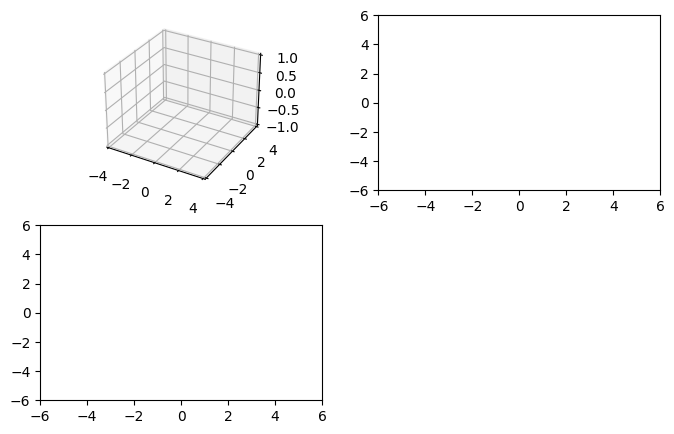

In [5]:
scale = 20
t1 = t[::scale]

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection="3d")
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=["darkred","steelblue","green","orange","black"]

def init():
    
    ax.clear()
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(-1,1)
    
    ax1.clear()
    ax1.set_xlim(-6,6)
    ax1.set_ylim(-6,6) 
    
    ax2.clear()
    ax2.set_xlim(-6,6)
    ax2.set_ylim(-6,6) 
    
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planets):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0,0,0,s=40,color="y")
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)
        
        ax.scatter(x,y,z,color=colors[j])
        
        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)
    
    # Mercury
    Mx = Planets[0].GetPosition(scale)[:i,0] - Planets[2].GetPosition(scale)[:i,0]
    My = Planets[0].GetPosition(scale)[:i,1] - Planets[2].GetPosition(scale)[:i,1]
    
    # Venus
    Vx = Planets[1].GetPosition(scale)[:i,0] - Planets[2].GetPosition(scale)[:i,0]
    Vy = Planets[1].GetPosition(scale)[:i,1] - Planets[2].GetPosition(scale)[:i,1]
    
    # Earth
    Tx = Planets[2].GetPosition(scale)[:i,0] - Planets[2].GetPosition(scale)[:i,0]
    Ty = Planets[2].GetPosition(scale)[:i,1] - Planets[2].GetPosition(scale)[:i,1]
    
    # Mars
    Max = Planets[3].GetPosition(scale)[:i,0] - Planets[2].GetPosition(scale)[:i,0]
    May = Planets[3].GetPosition(scale)[:i,1] - Planets[2].GetPosition(scale)[:i,1]
    
    # Jupiter
    Jx = Planets[4].GetPosition(scale)[:i,0] - Planets[2].GetPosition(scale)[:i,0]
    Jy = Planets[4].GetPosition(scale)[:i,1] - Planets[2].GetPosition(scale)[:i,1]
    
    
    ax2.scatter(Mx,My,marker=".",label="Mercurio",color = colors[0])
    ax2.scatter(Vx,Vy,marker=".",label="Venus",color = colors[1])
    ax2.scatter(Tx,Ty,marker=".",label="Venus",color = colors[2])
    ax2.scatter(Max,May,marker=".",label="Venus",color = colors[3])
    ax2.scatter(Jx,Jy,marker=".",label="Venus",color = colors[4])
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

#### b.

In [6]:
periods = np.array([])

for planet in Planets:
    perihelio = planet.GetPerihelio()
    periods = np.append(periods, perihelio[1] - perihelio[0])

print(periods)

[ 0.241  0.615  1.001  1.881 11.873]


#### c.

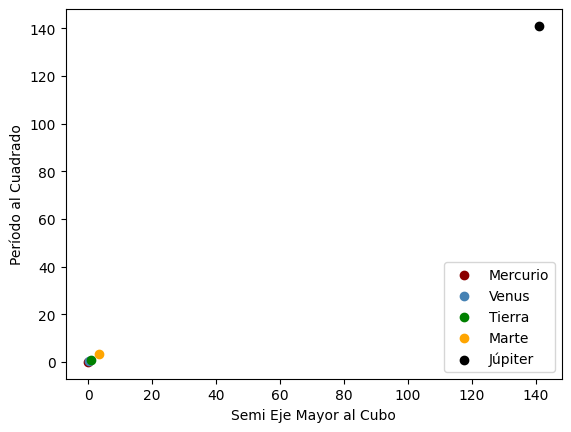

In [7]:
semi_eje = np.array([0.387, 0.723, 1.0, 1.524, 5.2044])**3
cuadratico = periods**2
names = ["Mercurio", "Venus", "Tierra", "Marte", "Júpiter"]

for i in range(len(names)):
    plt.scatter(semi_eje[i], cuadratico[i], color=colors[i], label=names[i])

plt.xlabel("Semi Eje Mayor al Cubo")
plt.ylabel("Período al Cuadrado")   
plt.legend(loc="lower right")

#### d.

In [8]:
def minimos_cuadrados(x,y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_x_2 = np.sum(x**2)
    pendiente = (n*sum_xy-(sum_x*sum_y))/(n*sum_x_2-(abs(sum_x)**2))
    intercepto = (sum_y*sum_x_2-sum_x*np.sum(x*y))/(n*sum_x_2-(abs(sum_x)**2))
    return pendiente,intercepto 
m,b = minimos_cuadrados(semi_eje,cuadratico)

print('Pendiente:', m,'Intercepto:', b)

Pendiente: 1.000018736850894 Intercepto: 0.00022658702526861968


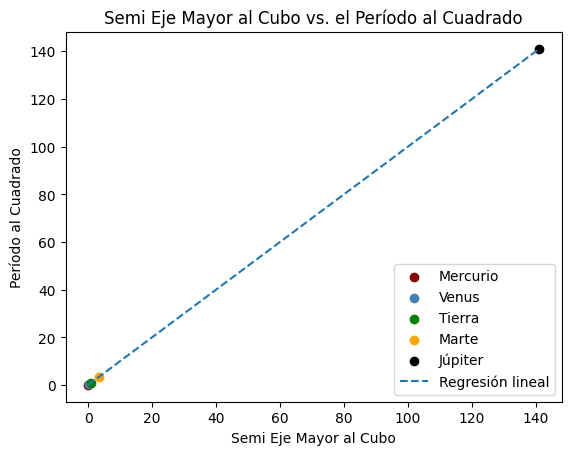

In [9]:
for i in range(len(names)):
    plt.scatter(semi_eje[i], cuadratico[i], color=colors[i], label=names[i])
plt.plot(semi_eje,semi_eje*m+b, label = "Regresión lineal", linestyle='dashed')
plt.xlabel('Semi Eje Mayor al Cubo')
plt.ylabel('Período al Cuadrado')
plt.title('Semi Eje Mayor al Cubo vs. el Período al Cuadrado')    
plt.legend(loc='lower right')

#### e.

In [10]:
gauss = 1/m
SI = gauss*1.9885*10**30
print("La masa en unidades gaussianas es:", gauss, "masas solares. Y en SI es:", SI,"Kg")

La masa en unidades gaussianas es: 0.999981263500169 masas solares. Y en SI es: 1.9884627424700862e+30 Kg


### Punto 5

In [11]:
def ExactFunc(t,alpha=-1):
    
    func= np.e**(t*alpha)
    return func

def Aprox_Func(delta,k,u_0):
    
    func = ((1+delta)**k)*u_0
    return func

In [12]:
t_exacto=np.arange(0,10,0.01)
k=np.arange(0,6,1)
u_0=ExactFunc(0,)

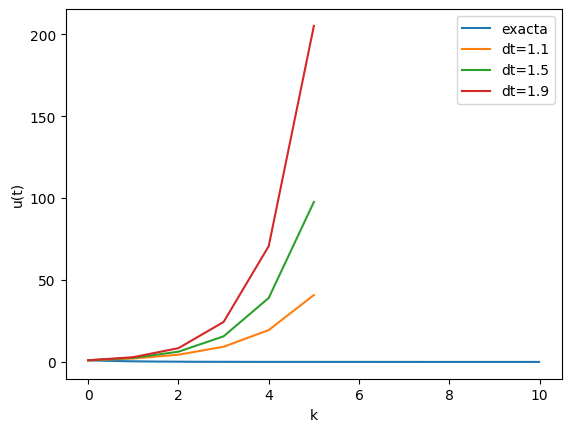

In [13]:
plt.plot(t_exacto,ExactFunc(t_exacto,),label='exacta')
plt.plot(k,Aprox_Func(1.1,k,u_0),label='dt=1.1')
plt.plot(k,Aprox_Func(1.5,k,u_0),label='dt=1.5')
plt.plot(k,Aprox_Func(1.9,k,u_0),label='dt=1.9')
plt.xlabel("k")
plt.ylabel("u(t)")
plt.legend(loc="upper right")